# 01 — Summary Chart of students transferring from Quarterly or Semester based community college


In [6]:
# make_outputs.py
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

root = Path.cwd()
processed = root / "data" / "processed"
processed.mkdir(parents=True, exist_ok=True)
figs = processed / "figs"
figs.mkdir(parents=True, exist_ok=True)

df = pd.read_csv(processed / "fake_data_individual_patched.csv")

assert df["ID"].is_unique, "Expected one row per student; duplicates found."
if "Calendar_Type" not in df.columns:
    raise ValueError("Calendar_Type not found in fake_data_individual_patched.csv")

# Optional: keep only CC transfers (belt & suspenders)
if "CC_transfer" in df.columns:
    df = df[df["CC_transfer"] == 1].copy()

# ---------------- Page-9 style summary table ----------------
# (Means with SD in parentheses by Calendar_Type, plus 'All' column)
summary_cols = [
    "final_GPA", "time_to_grad", "extra_quarters", "grad_on_time",
    "graduated", "total_units", "CC_GPA_standard", "age_at_grad"
]
existing = [c for c in summary_cols if c in df.columns]

def mean_sd(x: pd.Series) -> str:
    return f"{x.mean():.2f} ({x.std():.2f})"

table = df.groupby("Calendar_Type")[existing].agg(mean_sd).T
table["All"] = df[existing].agg(mean_sd)
# order columns as All, Semester, Quarter (if present)
ordered_cols = ["All"] + [c for c in ["Semester", "Quarter"] if c in table.columns]
table = table[ordered_cols]
table_path = processed / "table_summary_stats_page9_style.csv"
table.to_csv(table_path)
print("Wrote summary table ->", table_path)

Wrote summary table -> c:\Users\Tihi\Downloads\cc_transfers_vscode_starter\data\processed\table_summary_stats_page9_style.csv


# Graph 1 - Bar chart displaying the number of transfer students calendar types

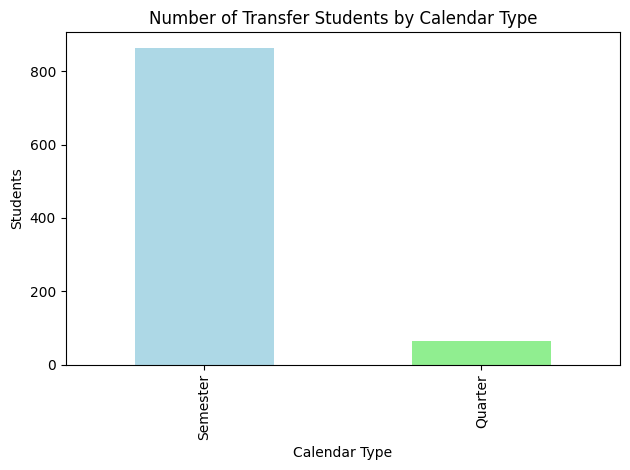

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# %matplotlib inline  # <- uncomment once per notebook if needed

root = Path.cwd()
processed = root / "data" / "processed"
processed.mkdir(parents=True, exist_ok=True)
figs = processed / "figs"
figs.mkdir(parents=True, exist_ok=True)

df = pd.read_csv(processed / "fake_data_individual_patched.csv")

assert df["ID"].is_unique, "Expected one row per student; duplicates found."
if "Calendar_Type" not in df.columns:
    raise ValueError("Calendar_Type not found in fake_data_individual_patched.csv")

if "CC_transfer" in df.columns:
    df = df[df["CC_transfer"] == 1].copy()

# Ensure both categories appear on the axis even if one is missing
counts = df["Calendar_Type"].value_counts()
counts = counts.reindex(["Semester", "Quarter"], fill_value=0)

ax = counts.plot(kind="bar", color=["lightblue", "lightgreen"])
plt.title("Number of Transfer Students by Calendar Type")
plt.xlabel("Calendar Type")
plt.ylabel("Students")
plt.tight_layout()
plt.savefig(figs / "01_counts_by_calendar.png")
plt.show()  # <-- display in notebook
plt.close()
plt.savefig(figs / "01_counts_by_calendar.pdf")


# Graph 2 - Box plot displaying the timeframe of students graduating based on their calendar type

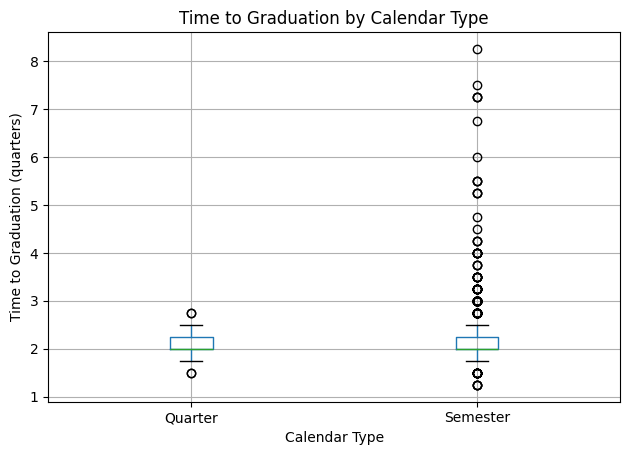

In [17]:
if "time_to_grad" in df.columns:
    df.boxplot(column="time_to_grad", by="Calendar_Type")
    plt.title("Time to Graduation by Calendar Type")
    plt.suptitle("")
    plt.xlabel("Calendar Type")
    plt.ylabel("Time to Graduation (quarters)")
    plt.tight_layout()
    plt.savefig(figs / "02_box_time_to_grad.png")
    plt.show()


# Graph 3: Stacked bar: Gender distribution

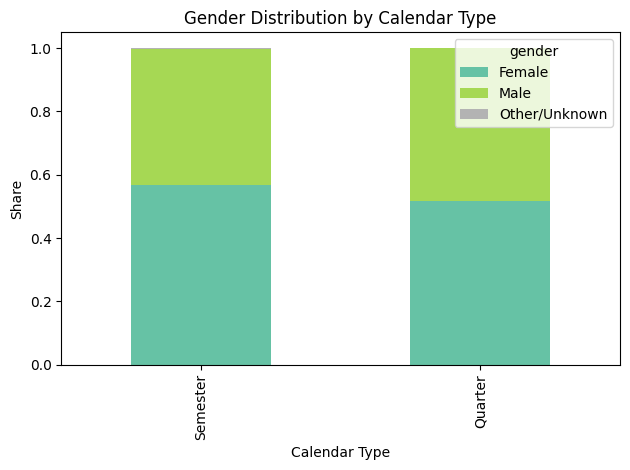

In [16]:
if "gender" in df.columns:
    (pd.crosstab(df["Calendar_Type"], df["gender"], normalize="index")
       .reindex(["Semester", "Quarter"])
       .plot(kind="bar", stacked=True, colormap="Set2"))
    plt.title("Gender Distribution by Calendar Type")
    plt.xlabel("Calendar Type")
    plt.ylabel("Share")
    plt.tight_layout()
    plt.savefig(figs / "04_stacked_gender.png")
    plt.show()


# Graph 4: Histogram of CC GPA Distribution

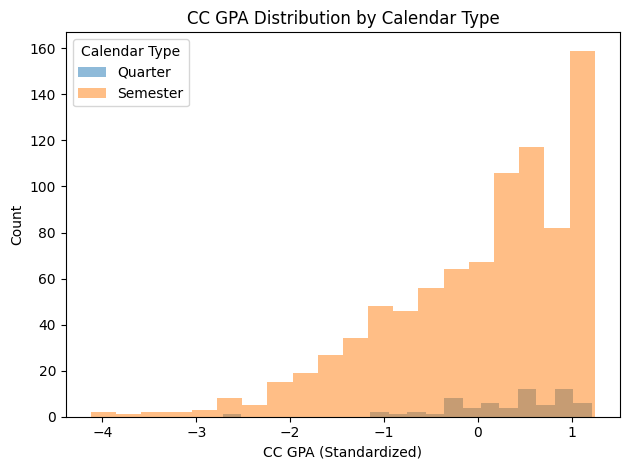

In [15]:
if "CC_GPA_standard" in df.columns:
    for cal, g in df.groupby("Calendar_Type"):
        g["CC_GPA_standard"].plot(kind="hist", alpha=0.5, bins=20, label=cal)
    plt.legend(title="Calendar Type")
    plt.title("CC GPA Distribution by Calendar Type")
    plt.xlabel("CC GPA (Standardized)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(figs / "05_hist_cc_gpa.png")
    plt.show()
